In [1]:
from scipy import *
import numpy as np
from pylab import *
from scipy.interpolate import interp1d
import os
from astropy.io import fits
from scipy.special import factorial
from classy import Class
%matplotlib inline

# Fiducial parameters

In [2]:
######## check TT, Pk (z=0), Clkk (z=1) from class vs camb

# LCDM parameters
A_s = 2.1e-9
h=0.7
OmegaB = 0.046
OmegaM = 0.3
n_s = 0.97
tau = 0.054 ## only for primary CMB, not used for now

# beyond LCDM, not implemented 
OmegaDE = 0.75
w0=-1.0#-0.5#
wa=0.0#0.1#
Neff = 3.046
mnu = 0.0

### derived parameters
#z_reio = 10.0 #11.357
ombh2 = OmegaB*h**2
omch2 = (OmegaM-OmegaB)*h**2
H0=h*100
### accuracy parameters
lmax=5000

In [13]:
zs=1.0
# create instance of the class "Class"

LambdaCDM = Class()
LambdaCDM.set({'omega_b':ombh2,'omega_cdm':omch2,'h':h,'A_s':A_s,'n_s':n_s})
LambdaCDM.set({'output':'mPk,sCl',
               'P_k_max_1/Mpc':10.0,
               #'z_pk':0,
               #'reio_parametrization':'reio_none',
               'l_switch_limber':100,
               'selection':'dirac',
               'selection_mean':1.0,
               'l_max_lss':lmax,
               'perturb_sampling_stepsize':0.01
              })
# run class
LambdaCDM.compute()

si8=LambdaCDM.sigma8()

In [21]:
cls=LambdaCDM.density_cl(lmax)
print cls.viewkeys()
ell=cls['ell'][2:]
clphiphi=cls['ll'][0][2:]
clkk=1.0/4 * (ell+2.0)*(ell+1.0)*(ell)*(ell-1.0)*clphiphi

dict_keys(['ll', 'ell'])


Text(0.5,1,'2020/3/12 Clkk test (z_s=1)')

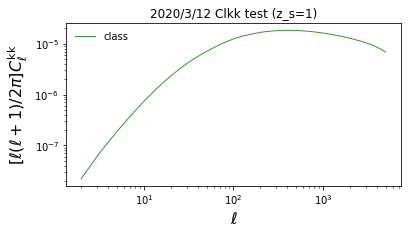

In [25]:
figure(3, figsize=(6,3))
xscale('log');yscale('log');#xlim(2,2500)
xlabel(r'$\ell$',fontsize=16)
ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{kk}$',fontsize=16)
plot(ell,clkk*ell*(ell+1)/2./pi,'g-',lw=1,alpha=0.8,label='class')
legend(loc=0,frameon=0)
title('2020/3/12 Clkk test (z_s=1)')